<a href="https://colab.research.google.com/github/jcanevello/MIA-PythonInteligenciaArtificial/blob/master/01MAIR_ACT_Video_Jean_Canevello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="../img/viu_logo.png" width="200">

##Alumno: Jean Canevello Salazar

## 01MIAR - Actividad Video Valenbici

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Las entregas sólo serán validas si se realizan a través del site de la asignatura: Actividades, Actividad Video.

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Entrega
- Convocatoria 1 - 12/12/2022
- Convocatoria 2 - 06/03/2023

#### Descripción
El conjunto de datos "estaciones_bici.csv" (fichero disponible en carpeta videos/res en drive) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 15 minutos de cada una de las estaciones disponibles:

http://www.valenbisi.es/service/carto/json

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

http://www.valenbisi.es/service/stationdetails/valence/[número de estación]

#### Columnas para trabajar:
- station: id de la estación
- total: número total de bornetas
- download_date: timestamp de la descarga de datos
- available: número de bicis disponibles

#### Actividad
- 01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame
- 02 - Obtención del número de estaciones que tienen un total de 30 bornetas
- 03 - Número de estación con la media más alta de bicis disponibles
- 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior
- 05 - Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

---
# 00 - Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

# 01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame

In [2]:
#define el nombre de las cabeceras del csv
columns_name = ['index','id','available','connected','download_date','station','free','open','ticket','total','updated']

#define el tipo de dato de cada columna a excepción de los date
columns_type = {
      'index':        np.dtype('int'),
      'id':           np.dtype('O'),
      'available':    np.dtype('int'),
      'connected':    np.dtype('int'),
      'station':      np.dtype('int'),
      'free':         np.dtype('int'),
      'open':         np.dtype('int'),
      'ticket':       np.dtype('int'),
      'total':        np.dtype('int'),
    }
    
#lista de columnas de tipo datetime
columns_date = ['download_date', 'updated']

#utilizamos la función read_csv para leer el archivo
df_read = pd.read_csv('estaciones_bici.csv', # nombre del archivo
                      sep=';', #identifica el valor de cada columna separado por ';'
                      header=0, #ignora la cabecera que tiene el archivo
                      names=columns_name,  #utiliza los nombres de la lista columns_name como nombre de las columnas
                      index_col='index', #define el nombre del index del dataframe como 'index'
                      dtype=columns_type, #utiliza la lista columns_type como los tipos de datos de cada columna
                      parse_dates=columns_date #identifica como tipo de dato datetime a los nombre de columnas de la lista columns_date
                      )

#filtra las variables de interés
df_station = df_read[['station', 'total', 'download_date', 'available']]

#mostramos los datos con los que vamos a trabajar
display(df_station)

,station,total,download_date,available
index,,,,
0,64,20,2019-02-10 17:25:37.787,9
1,73,20,2019-02-10 17:25:37.787,6
2,63,20,2019-02-10 18:13:39.827,20
3,64,20,2019-02-10 18:13:39.827,6
4,65,19,2019-02-10 18:13:39.827,9
...,...,...,...,...
27542,260,20,2019-02-11 23:44:00.786,0
27543,261,19,2019-02-11 23:44:00.786,15
27544,268,10,2019-02-11 23:44:00.786,1


# 02 - Obtención del número de estaciones que tienen un total de 30 bornetas

In [3]:
#creamos un nuevo dataFrame con las estaciones, total de bornetas 
#y la media de bicis disponibles
df_borneta_by_station = df_station\
                          .groupby(['station', 'total'], as_index=False)\
                          .agg(mean_available=('available','mean'))

#Contamos las estaciones que tienen 30 bornetas en total
#primero filtramos por el campo total los que tienen 30 bornetas y luego hacemos un conteo
ctd_station = df_borneta_by_station.query('total == 30').count()[0]

#Mostramos el total de estaciones con 30 bornetas
print(f'Total de estaciones con 30 bornetas es: {ctd_station}')

Total de estaciones con 30 bornetas es: 11


# 03 - Número de estación con la media más alta de bicis disponibles

In [4]:
#Del dataFrame generado en la celda anterior
#obtenemos la estación con la media más alta, para esto utilizamos la función sort_values
#para ordenar de mayor a menor por la media de available y nos quedamos con el primer row
#utilizando la función iloc[0]
station_id = df_borneta_by_station.sort_values('mean_available', ascending=False)['station'].iloc[0]

#Mostramos el id de la estación obtenida
print(f'Número de estación con media más alta es: {station_id}')

Número de estación con media más alta es: 50


# 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior

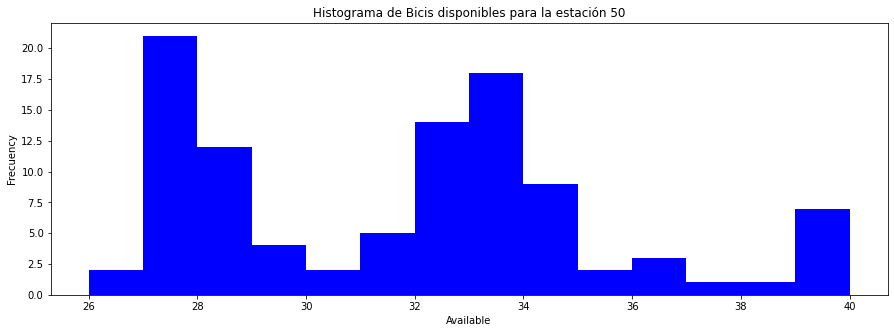

In [5]:
#Del dataFrame inicial(df_estation) filtramos los registros capturados de la 
#estación obtenida en la celda anterior
#utilizamo la función copy para evitar el settingwithcopywarning en los filtros 
#y asignaciones que utilizaremos más adelante. 
df_station_max_mean = df_station.query(f'station == {station_id}')

#generamos una lista de la cantidad de biscis diponibles por cada medición del servicio web 
list_available = df_station_max_mean['available'].to_list()


#definimos el tamaño del gráfico
plot.figure(figsize=(15,5))

#utilizamos la función hist para graficar un histograma
#donde x es la lista de cantidad de biscis disponibles
#bins es la lista de etiquetas del eje x
plot.hist(x=list_available, bins=np.unique(list_available), color = "blue")

#título del gráfico
plot.title(f'Histograma de Bicis disponibles para la estación {station_id}')

#título del eje X
plot.xlabel('Available')

#título del eje Y
plot.ylabel('Frecuency')

#pintamos el gráfico
plot.show()

# 05 - Realizar gráfica con la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

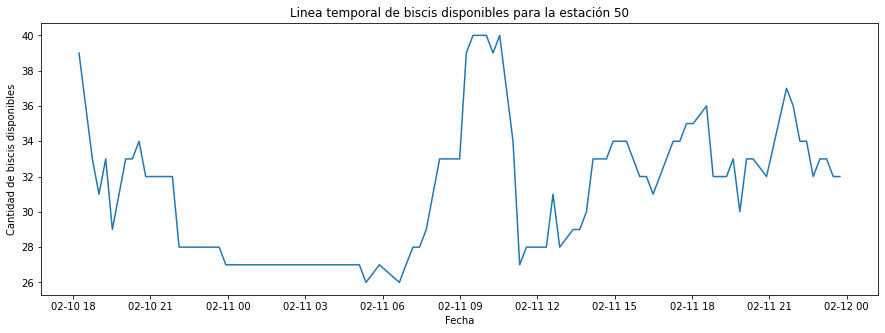

In [6]:
#definimos el tamaño del gráfico
plot.figure(figsize=(15,5))

#utilizamos la función plot para graficar una linea de tiempo donde
#el primer parámetro son las fechas obtenidas de la columna download_date
#el segundo parámetro son los valores de la cantidad de biscis disponibles por cada download_date
plot.plot(df_station_max_mean.download_date, df_station_max_mean.available)

#título del gráfico
plot.title(f'Linea temporal de biscis disponibles para la estación {station_id}')

#título del eje X
plot.xlabel('Fecha')

#título del eje Y
plot.ylabel('Cantidad de biscis disponibles')

#pintamos el gráfico
plot.show()